In [1]:
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# https://www.math.stonybrook.edu/~tony/tides/harmonic.html
# w is used in place of ω
# O is used in place of Ω
w1 = 15 # deg/hr
w2 = 0.54901653 # deg/hr
w3 = 0.04106864 # deg/hr
p = 0.00464183 # the precession of the Moon's perigee
O = 2*(w1 - w2 + w3) # 28.984 deg/hr (from project description)
S2 = 30 # S2 from link, effect of sun on tides
K1 = w1 + w3
N2 = 2*w1 - 3*w2 + 2*w3 + p

to_rads = np.pi / 180
to_degs = 180 / np.pi

h0, a, b, c, d, e, f = sy.symbols("h0, a, b, c, d, e, f")

In [3]:
bristol_data = pd.read_excel(sys.path[0] + "\..\TideData.xlsx", sheet_name = "Bristol")

donaghadee_data = pd.read_excel(sys.path[0] + "\..\TideDayData.xlsx", sheet_name = "Donaghadee")

In [7]:
def lin_eq_OS2N2(h, t):
    return sy.Eq(h0 + a*sy.cos(O*t*to_rads) + b*sy.sin(O*t*to_rads) 
                 + c*sy.cos(S2*t*to_rads) + d*sy.sin(S2*t*to_rads)
                 + e*sy.cos(N2*t*to_rads) + f*sy.sin(N2*t*to_rads), h)

def solve_system_OS2N2(heights_times):
    eqs = []
    for h_t in heights_times:
        eqs.append(lin_eq_OS2N2(h_t[0], h_t[1]))
    print(eqs)
    return sy.solve([eqs[0], eqs[1], eqs[2], eqs[3], eqs[4], eqs[5], eqs[6]], (h0,a,b,c,d,e,f), dict=True)[0]

def solve_bristol_OS2N2(sp, inc):
    vals = [[bristol_data["h"][sp], bristol_data['t'][sp]], 
            [bristol_data['h'][sp+inc], bristol_data['t'][sp+inc]], 
            [bristol_data['h'][sp+2*inc], bristol_data['t'][sp+2*inc]],
            [bristol_data['h'][sp+3*inc], bristol_data['t'][sp+3*inc]],
            [bristol_data['h'][sp+4*inc], bristol_data['t'][sp+4*inc]],
            [bristol_data['h'][sp+5*inc], bristol_data['t'][sp+5*inc]],
            [bristol_data['h'][sp+6*inc], bristol_data['t'][sp+6*inc]]]

    sol = solve_system_OS2N2(vals)
    #sy.pprint(sol)
    return sol

def get_local_max_minima_OS2N2(results, endpoint=336):
    t_vals = np.linspace(0, endpoint, 20160) # 1 point per minute for 2 weeks by default
    h_vals = (results[h0] + results[a]*np.cos(O*t_vals*to_rads) + results[b]*np.sin(O*t_vals*to_rads) 
              + results[c]*np.cos(S2*t_vals*to_rads) + results[d]*np.sin(S2*t_vals*to_rads)
              + results[e]*np.cos(N2*t_vals*to_rads) + results[f]*np.sin(N2*t_vals*to_rads) )
    
    predictions = {'Time' : [], 'Height' : [], 'High_or_Low' : []}
    for h in range(1,len(h_vals)-1):
        if h_vals[h-1] < h_vals[h] and h_vals[h] > h_vals[h+1]:
            print("High tide, t = " + str(t_vals[h]) + ", h = " + str(h_vals[h]))
            predictions['Time'].append(t_vals[h])
            predictions['Height'].append(h_vals[h])
            predictions['High_or_Low'].append("high")
        elif h_vals[h-1] > h_vals[h] and h_vals[h] < h_vals[h+1]:
            print("Low tide, t = " + str(t_vals[h]) + ", h = " + str(h_vals[h]))
            predictions['Time'].append(t_vals[h])
            predictions['Height'].append(h_vals[h])
            predictions['High_or_Low'].append("low")
    return pd.DataFrame(data = predictions)

In [10]:
results = solve_bristol_OS2N2(sp = 0, inc = 3)
sy.pprint(results)

[Eq(-0.496988562744272*a + 0.867757090723771*b - 0.559192903470747*c + 0.829037572555042*d - 0.46253614874849*e + 0.886600423584895*f + h0, 2.2), Eq(0.191353298089753*a - 0.981521225094075*b + 0.551936985312059*c - 0.833885822067168*d - 0.0175916992547186*e - 0.999845254085517*f + h0, 11.7), Eq(-0.167681464157894*a + 0.985841227874887*b - 0.77714596145697*c + 0.629320391049838*d + 0.216490877828944*e + 0.976284640776886*f + h0, 2.4), Eq(-0.125054049387708*a - 0.992149930570847*b + 0.793353340291234*c - 0.608761429008722*d - 0.631567851059087*e - 0.775320610785375*f + h0, 11.5), Eq(0.115463043003508*a + 0.993311776684627*b - 0.951056516295154*c + 0.309016994374947*d + 0.752011652009999*e + 0.659149812441142*f + h0, 2.6), Eq(-0.279346843176391*a - 0.96019026302467*b + 0.987688340595137*c - 0.156434465040234*d - 0.929247943092968*e - 0.369456709585154*f + h0, 10.6), Eq(0.229240151440363*a + 0.973369895244146*b - 0.974370064785236*c - 0.224951054343863*d + 0.968352493121672*e + 0.249586556

In [11]:
preds_df = get_local_max_minima_OS2N2(results)

Low tide, t = 2.5667939877970136, h = 0.138900634714772
High tide, t = 8.617094101889974, h = 13.2541421567931
Low tide, t = 14.667394215982934, h = 0.0923475769705244
High tide, t = 20.751029316930403, h = 13.2866978214419
Low tide, t = 26.83466441787787, h = 0.0883777182726333
High tide, t = 32.93496701225259, h = 13.2489631971962
Low tide, t = 39.03526960662731, h = 0.179055715940352
High tide, t = 45.16890718785654, h = 13.0959662579509
Low tide, t = 51.30254476908576, h = 0.401650686257605
High tide, t = 57.45284984374225, h = 12.7986669517450
Low tide, t = 63.60315491839873, h = 0.776509557099589
High tide, t = 69.78679497990971, h = 12.3460205713085
Low tide, t = 75.98710253484795, h = 1.30429077832257
High tide, t = 82.2207450766407, h = 11.7494755830862
Low tide, t = 88.47105511186071, h = 1.95834813425796
High tide, t = 94.77136762736247, h = 11.0559297569127
Low tide, t = 101.12168262314599, h = 2.66327123116623
High tide, t = 107.53866759263852, h = 10.3828873090726
Low tid

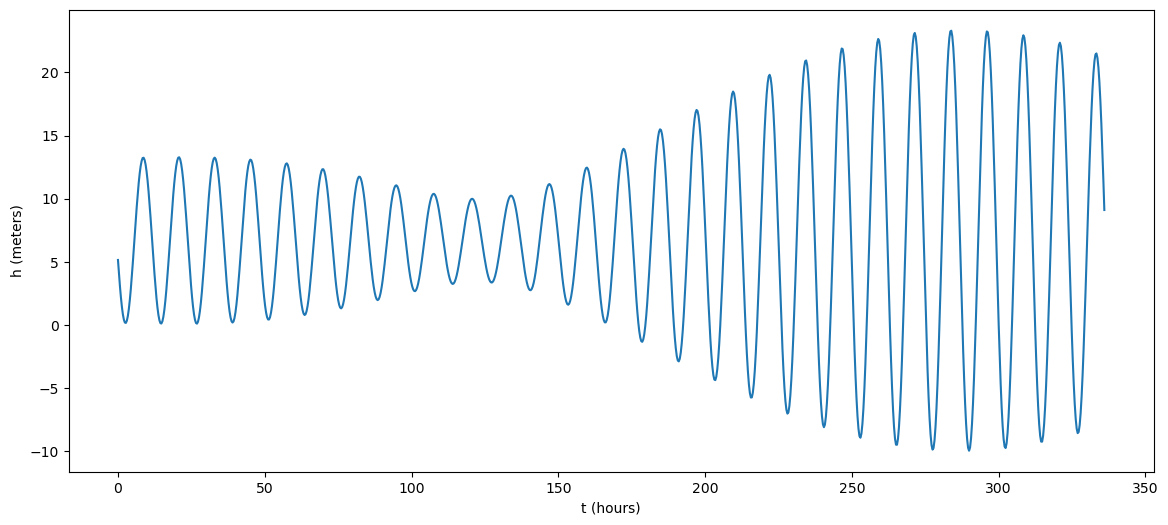

In [14]:
def plot_equation_d(results):
    t_vals = np.linspace(0, 336, 1000)
    h_vals = (results[h0] + results[a]*np.cos(O*t_vals*to_rads) + results[b]*np.sin(O*t_vals*to_rads)
     + results[c]*np.cos(S2*t_vals*to_rads) + results[d]*np.sin(S2*t_vals*to_rads)
              + results[e]*np.cos(N2*t_vals*to_rads) + results[f]*np.sin(N2*t_vals*to_rads))
    #print(h_vals)
    plt.figure(figsize=(14,6))
    p = plt.plot(t_vals, h_vals)
    plt.xlabel("t (hours)")
    plt.ylabel("h (meters)")
    ax = plt.gca()
    #ax.set_xlim(0, 336)
    #ax.set_ylim(0, 4)
    plt.savefig("Bristol_M2S2N2_2weeks.pdf", bbox_inches='tight')
    return h_vals
    
h_vals = plot_equation_d(results)